# Nasa - Asteroids classification

Esse notebook faz parte do trabalho da disciplina de Arquitetura de dados, ministrado pelo Prof. Dr. Dieval Guizelini, do curso de Pós Graduação em Inteligência Artificial Aplicada da UFPR.

O objetivo é aplicar técnicas de pré processamento de dados com a finalidade avaliar a sua utilidade a partir de métricas pré-estabelecidas, como acurácia, precisão e recall.

Usaremos a base de classificação de NEOs presente em: https://www.kaggle.com/shrutimehta/nasa-asteroids-classification.

**Alunos:** Luiza R. Marinho e Tiago J. da Silva

---

## 1. Para começar

A base escolhida é a base de classificação de asteróides próximos à Terra entre entre perigosos (com risco de colisão com a Terra) e não perigosos. *NEO* nesse contexto é o acrônimo para *Near Earth Object* e a página https://cneos.jpl.nasa.gov/about/neo_groups.html apresenta mais detalhes para aprofundamento.

**Características da base:**

- Essa base possui **4687 padrões**;
- A base possui **40 atributos**, sendo 39 features e 1 classe;
- Os padrões estão divididos entre **duas classes**;
- As classes presentes são **True** (risco de colisão) e **False** (sem risco de colisão);
- O atributo que representa a classe é **Hazardous**;
- **Há um problema de prevalência** tendo que a classe True concentra 84% dos padrões enquanto a classe False os 16% restantes;

**Tecnologias usadas**

- Python
- Scikit Learn framework

### Leitura da base

In [1]:
import pandas as pd

In [2]:
neo_df = pd.read_csv('nasa-asteroides-database.csv', sep = ',', engine = 'python', 
                            parse_dates=['Close Approach Date', 'Orbit Determination Date'])

In [3]:
neo_df.head()

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0               0.079051               0.176763            417.388066  ...   
1               0.090762               0.202951            479.225620  ...   
2               0.143849               0.321655            759.521423  ...   
3               0.005469               0.012229             28.876199  ...   
4               0.079051               0.176763            417.388066  ...   

   Asc Node Longitude Orbital Period  Perihelion Distance  Perihelion Arg  \
0          314.373913     609.599786             0.808259       57.257470   
1          136.717242     425.869294             0.718200      313.091975   
2          259.475979     643.580228             0.950791      248.415038   
3           57.173266     514.082140             0.983902       18.707701   
4           84.629307     495.597821             0.967687      158.263596   

   Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  Equinox  \
0       2.005764     2.458162e+06    264.837533     0.590551    J2000   
1       1.497352     2.457795e+06    173.741112     0.845330    J2000   
2       1.966857     2.458120e+06    292.893654     0.559371    J2000   
3       1.527904     2.457902e+06     68.741007     0.700277    J2000   
4       1.483543     2.457814e+06    135.142133     0.726395    J2000   

   Hazardous  
0       True  
1      False  
2       True  
3      False  
4       True  

[5 rows x 40 columns]

### Análise descritiva

#### Descrição dos atributos

| Atributo | Definição* | Tipo de dado |
| :--- | :--- | :--- |
| Neo Reference ID | Near Earth Object (NEO) reference ID number for an asteroid (or a comet) which comes close to earth| Categórico |
| Name | 'Name' of asteroid (same as NEO Reference ID) | Categórico |
| Absolute Magnitude | A measure of the asteroid's luminosity (in H) (the brightness of an asteroid if it is 1 astronomical unit away from both the Sun and the observer, and the angle between the Sun, asteroid, and Earth is 0 degrees) | Contínuo |
| Est Dia in KM(min) | Minimum estimated diameter of the asteroid in KM | Contínuo |
| Est Dia in KM(max) | Maximum estimated diameter of the asteroid in KM | Contínuo |
| Est Dia in M(min) | Minimum estimated diameter of the asteroid in M | Contínuo |
| Est Dia in M(max) | Maximum estimated diameter of the asteroid in M | Contínuo |
| Est Dia in Miles(min) | Minimum estimated diameter of the asteroid in Miles | Contínuo |
| Est Dia in Miles(max) | Maximum estimated diameter of the asteroid in Miles | Contínuo |
| Est Dia in Feet(min) | Minimum estimated diameter of the asteroid in Feet | Contínuo |
| Est Dia in Feet(max) | Maximum estimated diameter of the asteroid in Feet | Contínuo |
| Close Approach Date | Date at which the asteroid approaches close to Earth | Contínuo |
| Epoch Date Close Approach | Date at which the asteroid approaches close to Earth (in epoch time) | Discreto |
| Relative Velocity km per sec | Asteroid's velocity relative to earth in km per sec | Contínuo |
| Relative Velocity km per hr | Asteroid's velocity relative to earth in km per hr | Contínuo |
| Miles per hour | Asteroid's velocity relative to earth in miles per hour | Contínuo |
| Miss Dist.(Astronomical) | Distance by which the asteroid misses Earth in astronomical | Contínuo |
| Miss Dist.(lunar) | Distance by which the asteroid misses Earth in lunar | Contínuo |
| Miss Dist.(kilometers) | Distance by which the asteroid misses Earth in km) | Contínuo |
| Miss Dist.(miles) | Distance by which the asteroid misses Earth in miles | Contínuo |
| Orbiting Body | Name of orbited body | Categórico |
| Orbit ID | An ID of JPL NEA orbit that JPL Nasa uses in its analysis | Categórico |
| Orbit Determination Date | Date at which the asteroid's orbit was determined | Discreto |
| Orbit Uncertainity | A measure of the uncertainity ('measurement errors') in the calculated orbit | Discreto |
| Minimum Orbit Intersection | The closest distance between Earth and the asteroid in their respective orbits (in astronomical units) | Contínuo |
| Jupiter Tisserand Invariant | A value used to differentiate between asteroids and Jupiter-family comets | Contínuo |
| Epoch Osculation | The instance of time at which the asteroid's position and velocity vectors (from which its osculating orbit is calculated) is specified | Discreto |
| Eccentricity | A value which specifies by how much the asteroid's orbit deviates from a perfect circle | Contínuo |
| Semi Major Axis | The longest radius of an elliptical orbit; a easure of the asteroid's average distance from the Sun (asteroids orbit the Sun) | Contínuo |
| Inclination | Measures the tilt of the asteroid's orbit around the Sun | Contínuo |
| Asc Node Longitude | (copying from NASA) 'Angle in the ecliptic plane between the inertial-frame x-axis and the line through the ascending node' | Contínuo |
| Orbital Period | Time taken for asteroid to complete a single orbit around the Sun | Contínuo |
| Perihelion Distance | Distance of point in asteroid's orbit which is closest to the Sun | Contínuo |
| Perihelion Arg | (copying from Nasa) 'The angle (in the body's orbit plane) between the ascending node line and perihelion measured in the direction of the body's orbit' | Contínuo |
| Aphelion Dist | Distance of point in asteroid's orbit which is farthest from the Sun | Contínuo |
| Perihelion Time | Length of time of asteroid's passage through the perihelion stage | Contínuo |
| Mean Anomaly | (copying from Nasa) 'The product of an orbiting body's mean motion and time past perihelion passage') | Contínuo |
| Mean Motion | (copying from Nasa) 'The angular speed required for a body to make one orbit around an ideal ellipse with a specific semi-major axis' | Contínuo |
| Equinox | An astronomical standard to measure against (currently 'J2000.0') | Categórico |
| Hazardous | Is the asteroid hazardous? (True or False) | Categórico |

*Fonte: https://www.kaggle.com/kaggleuser654/is-the-asteroid-hazardous

#### Padrões por classe:

In [7]:
neo_df['Hazardous'].value_counts()

# 84% False, 16% True

False    3932
True      755
Name: Hazardous, dtype: int64

------

## 2. Primeira classificação

Precisaremos adaptar minimamente os dados pois o classificador que usaremos, o SVM, aceita apenas features numéricas. No nosso dataframe temos duas features categóricas: **Orbiting Body** e **Equinox**. Além deles há dois campos que armazenam datas: **Orbit Determination Date** e **Close Approach Date**, como podemos ver abaixo:

In [8]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Neo Reference ID              4687 non-null   int64         
 1   Name                          4687 non-null   int64         
 2   Absolute Magnitude            4687 non-null   float64       
 3   Est Dia in KM(min)            4687 non-null   float64       
 4   Est Dia in KM(max)            4687 non-null   float64       
 5   Est Dia in M(min)             4687 non-null   float64       
 6   Est Dia in M(max)             4687 non-null   float64       
 7   Est Dia in Miles(min)         4687 non-null   float64       
 8   Est Dia in Miles(max)         4687 non-null   float64       
 9   Est Dia in Feet(min)          4687 non-null   float64       
 10  Est Dia in Feet(max)          4687 non-null   float64       
 11  Close Approach Date           

In [9]:
neo_df[['Orbit Determination Date', 'Close Approach Date', 'Orbiting Body', 'Equinox']].head()

Orbit Determination Date Close Approach Date Orbiting Body Equinox
0      2017-04-06 08:36:37          1995-01-01         Earth   J2000
1      2017-04-06 08:32:49          1995-01-01         Earth   J2000
2      2017-04-06 09:20:19          1995-01-08         Earth   J2000
3      2017-04-06 09:15:49          1995-01-15         Earth   J2000
4      2017-04-06 08:57:58          1995-01-15         Earth   J2000

Para conseguirmos executar nosso classificador precisaremos:

- Remover os campos de data
- Converter os valores categóricos em valores numéricos.

Essas duas ações já representam ações de pré-processamento.

#### Remoção dos campos de data

In [10]:
neo_df.drop('Orbit Determination Date', 1, inplace = True)
neo_df.drop('Close Approach Date', 1, inplace = True)

#### Codificação de features categóricas

In [11]:
orbiting_body_factor = pd.factorize(neo_df['Orbiting Body'])
equinox_factor = pd.factorize(neo_df['Equinox'])

In [12]:
neo_df['Orbiting Body'] = orbiting_body_factor[0]
neo_df['Equinox'] = equinox_factor[0]

In [14]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Epoch Date Close Approach     4687 non-null   int64  
 12  Relative Velocity km per sec  4687 non-null   float64
 13  Rel

### Definição das features

In [15]:
features = neo_df.columns.tolist()
features = features[0:-1]
pd.DataFrame({'Feature':features})

Feature
0               Neo Reference ID
1                           Name
2             Absolute Magnitude
3             Est Dia in KM(min)
4             Est Dia in KM(max)
5              Est Dia in M(min)
6              Est Dia in M(max)
7          Est Dia in Miles(min)
8          Est Dia in Miles(max)
9           Est Dia in Feet(min)
10          Est Dia in Feet(max)
11     Epoch Date Close Approach
12  Relative Velocity km per sec
13   Relative Velocity km per hr
14                Miles per hour
15      Miss Dist.(Astronomical)
16             Miss Dist.(lunar)
17        Miss Dist.(kilometers)
18             Miss Dist.(miles)
19                 Orbiting Body
20                      Orbit ID
21            Orbit Uncertainity
22    Minimum Orbit Intersection
23   Jupiter Tisserand Invariant
24              Epoch Osculation
25                  Eccentricity
26               Semi Major Axis
27                   Inclination
28            Asc Node Longitude
29                Orbital Period
30           Perihelion Distance
31                Perihelion Arg
32                 Aphelion Dist
33               Perihelion Time
34                  Mean Anomaly
35                   Mean Motion
36                       Equinox

### Separação de dados entre Treino e Teste

Separaremos 80% dos padrões para treino e 20% para teste.

In [16]:
from sklearn.model_selection import train_test_split

neo_features_df = neo_df.iloc[:,:-1]
neo_classes_df = neo_df.iloc[:,-1]

features_train, features_test, classes_train, classes_test = \
train_test_split(neo_features_df, neo_classes_df, test_size = 0.2, random_state = 1, stratify = neo_classes_df)

Por conta do desbalanceamento presente na base, usamos o parâmetro *stratify* que mantém a proporcionalidade das classes na criação dos subconjuntos de treino e teste.

In [17]:
classes_train.value_counts()

False    3145
True      604
Name: Hazardous, dtype: int64

### Classificação

In [18]:
from sklearn import svm

clf = svm.SVC()
clf.fit(features_train, classes_train)
predicted = clf.predict(features_test)

### Métricas

##### Matriz de confusão

<AxesSubplot:xlabel='Predito', ylabel='Esperado'>

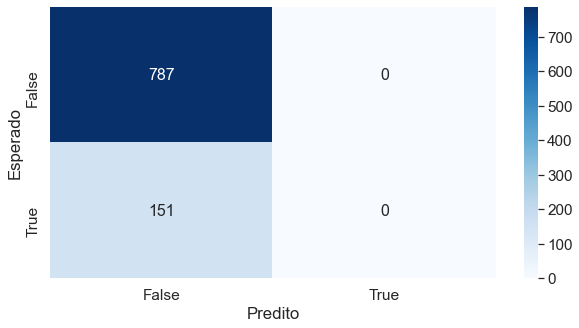

In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

cm = confusion_matrix(classes_test, predicted)

cm_df = pd.DataFrame(cm, columns = np.unique(classes_test), index = np.unique(classes_test))
cm_df.index.name = 'Esperado'
cm_df.columns.name = 'Predito'
plt.figure(figsize = (10,5))
sn.set(font_scale = 1.4)
sn.heatmap(cm_df, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

##### Report classification

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Acurácia: %.2f' % accuracy_score(classes_test, predicted))
print('Precisão: %.2f' % precision_score(classes_test, predicted, zero_division = True))
print('Recall: %.2f' % recall_score(classes_test, predicted, zero_division = True))
print('F-sore: %.2f' % f1_score(classes_test, predicted, zero_division = True))

Acurácia: 0.84
Precisão: 1.00
Recall: 0.00
F-sore: 0.00


In [21]:
from sklearn import metrics

metrics_pre = metrics.classification_report(classes_test, predicted, zero_division = True)
print(metrics_pre)

              precision    recall  f1-score   support

       False       0.84      1.00      0.91       787
        True       1.00      0.00      0.00       151

    accuracy                           0.84       938
   macro avg       0.92      0.50      0.46       938
weighted avg       0.86      0.84      0.77       938



-----

## 3. Pré-processamento

### Codificação

Anteriormente, no item *2. Primeira classificação*, tivemos que antecipar a etapa de codificação para que o primeiro modelo pudesse ser criado.

Essa etapa consiste em alterar valores categóricos para valores numéricos. Na ocasião transformamos os valores de **'Orbiting Body'** e **'Equinox'** onde cada valor passou a ser representado por um número.

### Seleção de dados

In [22]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Epoch Date Close Approach     4687 non-null   int64  
 12  Relative Velocity km per sec  4687 non-null   float64
 13  Rel

Ao analisar os dados presentes no dataframe percebemos que alguns são insignificantes, como alguns *ids*, e outros que são repetidos em escalas diferentes. A primeira coisa que podemos fazer é remover tais campos.

#### Remove identificadores

In [23]:
neo_df = neo_df.drop(columns = ['Neo Reference ID',
                               'Name',
                               'Orbit ID'])

#### Remove valores repetidos em diferentes escalas

In [24]:
neo_df = neo_df.drop(columns = ['Est Dia in M(min)',
                               'Est Dia in M(max)',
                               'Est Dia in Miles(min)',
                               'Est Dia in Miles(max)',
                               'Est Dia in Feet(min)', 
                               'Est Dia in Feet(max)',
                               'Relative Velocity km per sec',
                               'Miles per hour',
                               'Miss Dist.(Astronomical)',
                               'Miss Dist.(lunar)',
                               'Miss Dist.(miles)'
                               ])

In [25]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           4687 non-null   float64
 1   Est Dia in KM(min)           4687 non-null   float64
 2   Est Dia in KM(max)           4687 non-null   float64
 3   Epoch Date Close Approach    4687 non-null   int64  
 4   Relative Velocity km per hr  4687 non-null   float64
 5   Miss Dist.(kilometers)       4687 non-null   float64
 6   Orbiting Body                4687 non-null   int64  
 7   Orbit Uncertainity           4687 non-null   int64  
 8   Minimum Orbit Intersection   4687 non-null   float64
 9   Jupiter Tisserand Invariant  4687 non-null   float64
 10  Epoch Osculation             4687 non-null   float64
 11  Eccentricity                 4687 non-null   float64
 12  Semi Major Axis              4687 non-null   float64
 13  Inclination       

#### Cria média para Est Dia in KM

In [26]:
neo_df['Est Dia in KM(mean)'] = neo_df[['Est Dia in KM(min)', 'Est Dia in KM(max)']].mean(axis = 1)

In [27]:
neo_df = neo_df[['Absolute Magnitude',
                'Est Dia in KM(mean)',
                'Epoch Date Close Approach',
                'Relative Velocity km per hr',
                'Miss Dist.(kilometers)',
                'Orbiting Body',
                'Orbit Uncertainity',
                'Minimum Orbit Intersection',
                'Jupiter Tisserand Invariant',
                'Epoch Osculation',
                'Eccentricity',
                'Semi Major Axis',
                'Inclination',
                'Asc Node Longitude',
                'Orbital Period',
                'Perihelion Distance',
                'Aphelion Dist',
                'Perihelion Time',
                'Mean Anomaly',
                'Mean Motion',
                'Equinox',
                'Hazardous'
               ]]

In [28]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           4687 non-null   float64
 1   Est Dia in KM(mean)          4687 non-null   float64
 2   Epoch Date Close Approach    4687 non-null   int64  
 3   Relative Velocity km per hr  4687 non-null   float64
 4   Miss Dist.(kilometers)       4687 non-null   float64
 5   Orbiting Body                4687 non-null   int64  
 6   Orbit Uncertainity           4687 non-null   int64  
 7   Minimum Orbit Intersection   4687 non-null   float64
 8   Jupiter Tisserand Invariant  4687 non-null   float64
 9   Epoch Osculation             4687 non-null   float64
 10  Eccentricity                 4687 non-null   float64
 11  Semi Major Axis              4687 non-null   float64
 12  Inclination                  4687 non-null   float64
 13  Asc Node Longitude

#### Relação entre atributos

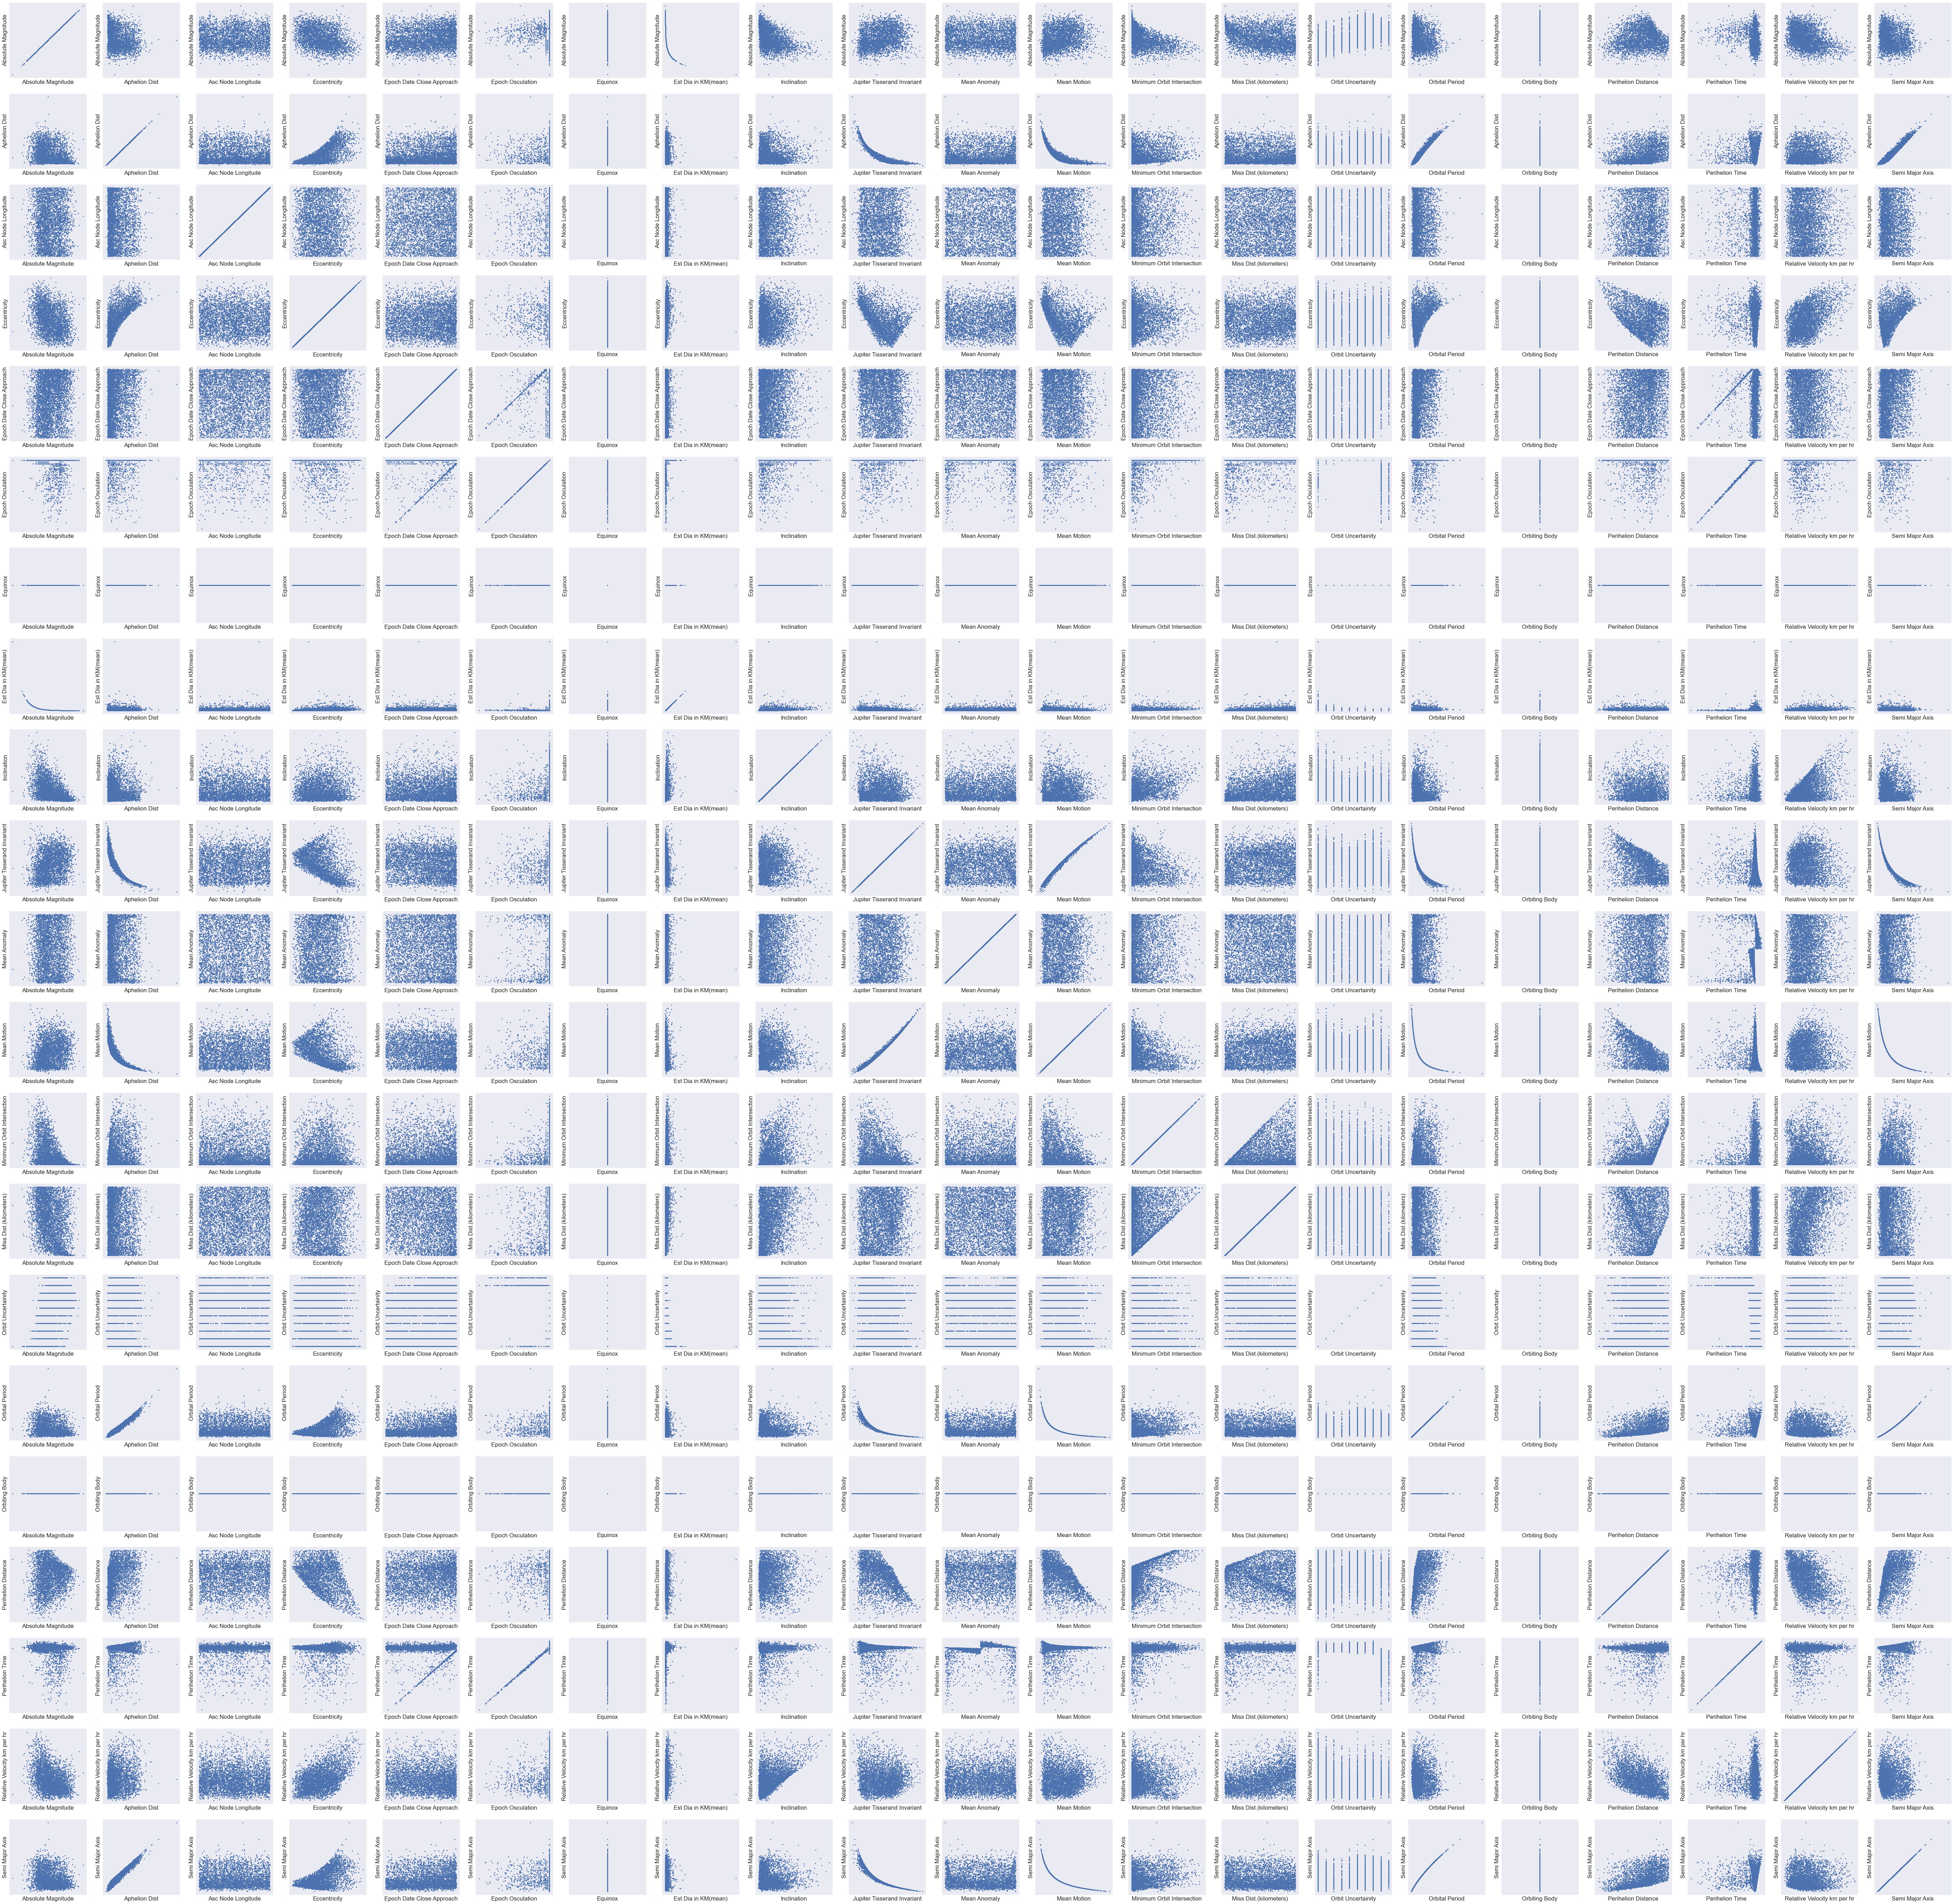

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

colunas = list(neo_df.head())
colunas = colunas[0:-1]
nomeColunas = sorted(colunas) 
numColunas = len(nomeColunas)
fig, ax = plt.subplots(numColunas, numColunas, figsize=(100, 100), constrained_layout = False)

for lin in range(0, numColunas):
    for col in range(0,numColunas): 
        ax[lin,col].scatter(x = neo_df[nomeColunas[col]], y = neo_df[nomeColunas[lin]],s = 4) 
        ax[lin,col].set(xticks = [], yticks = [], xlabel = nomeColunas[col], ylabel = nomeColunas[lin])
        
plt.show()

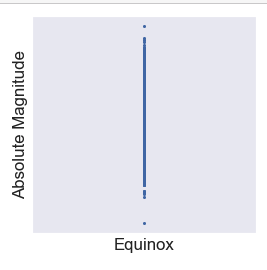

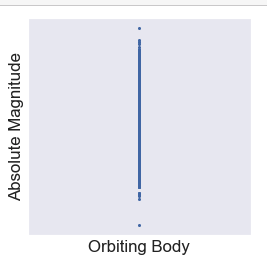

#### Remove atributos com baixa variância

Ao observar os gráficos de relação entre os atributos percebemos que dois deles não possuem variância: **'Equinox'** e **'Orbiting Body'**, por isso ambos serão removidos.

In [30]:
neo_df[['Equinox', 'Orbiting Body']].value_counts()

Equinox  Orbiting Body
0        0                4687
dtype: int64

In [31]:
neo_df = neo_df.drop(columns = ['Equinox',
                               'Orbiting Body'
                               ])

In [32]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           4687 non-null   float64
 1   Est Dia in KM(mean)          4687 non-null   float64
 2   Epoch Date Close Approach    4687 non-null   int64  
 3   Relative Velocity km per hr  4687 non-null   float64
 4   Miss Dist.(kilometers)       4687 non-null   float64
 5   Orbit Uncertainity           4687 non-null   int64  
 6   Minimum Orbit Intersection   4687 non-null   float64
 7   Jupiter Tisserand Invariant  4687 non-null   float64
 8   Epoch Osculation             4687 non-null   float64
 9   Eccentricity                 4687 non-null   float64
 10  Semi Major Axis              4687 non-null   float64
 11  Inclination                  4687 non-null   float64
 12  Asc Node Longitude           4687 non-null   float64
 13  Orbital Period    

#### Atualiza a lista de features

In [33]:
features = neo_df.columns.tolist()
features = features[0:-1]
pd.DataFrame({'Feature':features})

Feature
0            Absolute Magnitude
1           Est Dia in KM(mean)
2     Epoch Date Close Approach
3   Relative Velocity km per hr
4        Miss Dist.(kilometers)
5            Orbit Uncertainity
6    Minimum Orbit Intersection
7   Jupiter Tisserand Invariant
8              Epoch Osculation
9                  Eccentricity
10              Semi Major Axis
11                  Inclination
12           Asc Node Longitude
13               Orbital Period
14          Perihelion Distance
15                Aphelion Dist
16              Perihelion Time
17                 Mean Anomaly
18                  Mean Motion

#### Seleciona as features mais significativas

Sobre a relevância dos atributos, a página https://cneos.jpl.nasa.gov/about/neo_groups.html nos diz:

"Potentially Hazardous Asteroids (PHAs) are currently defined based on parameters that measure the asteroid's potential to make threatening close approaches to the Earth. Specifically, all asteroids with an Earth **Minimum Orbit Intersection Distance** (MOID) of 0.05 au or less and an **absolute magnitude (H)** of 22.0 or less are considered PHAs".

A partir dessa informação podemos concluir que apenas as duas features são suficientes para o nosso modelo.
Para confirmar essa tese usaremos um algoritmo para medir a relevância de cada atributo.

In [34]:
from sklearn.ensemble import RandomForestClassifier

neo_features_df = neo_df[features]
neo_classes_df = neo_df.iloc[:,-1]

model = RandomForestClassifier(n_estimators = 10, random_state = 1)
model.fit(neo_features_df, neo_classes_df)

RandomForestClassifier(n_estimators=10, random_state=1)

In [35]:
features_importances_df = pd.DataFrame(model.feature_importances_, index = neo_features_df.columns,
                                     columns = ['importance']).sort_values('importance', ascending = False)

features_importances_df

importance
Minimum Orbit Intersection     0.315479
Absolute Magnitude             0.248534
Est Dia in KM(mean)            0.149289
Orbit Uncertainity             0.070737
Inclination                    0.044963
Perihelion Distance            0.040185
Relative Velocity km per hr    0.021909
Eccentricity                   0.021124
Miss Dist.(kilometers)         0.016274
Mean Motion                    0.010957
Jupiter Tisserand Invariant    0.010552
Asc Node Longitude             0.008519
Perihelion Time                0.007710
Aphelion Dist                  0.007237
Mean Anomaly                   0.006778
Orbital Period                 0.006451
Semi Major Axis                0.005803
Epoch Osculation               0.003790
Epoch Date Close Approach      0.003707

Podemos concluir que as features **Minimum Orbit Intersection** e **Absolute Magnitude** são as mais significativas, portanto usaremos apenas elas.

In [38]:
neo_df = neo_df[['Minimum Orbit Intersection',
                'Absolute Magnitude',
                'Hazardous'
               ]]

In [39]:
neo_df.head()

Minimum Orbit Intersection  Absolute Magnitude  Hazardous
0                    0.025282                21.6       True
1                    0.186935                21.3      False
2                    0.043058                20.3       True
3                    0.005512                27.4      False
4                    0.034798                21.6       True

/opt/anaconda3/envs/python_2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


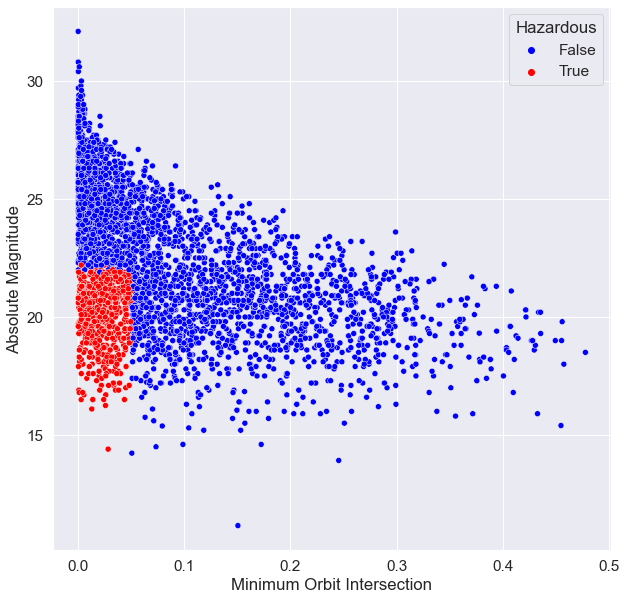

In [40]:
plt.figure(figsize=(10,10))
sn.scatterplot(neo_df['Minimum Orbit Intersection'], 
                neo_df['Absolute Magnitude'], 
                hue = neo_df['Hazardous'], 
                palette={1: 'red', 0:'blue'})
plt.show()

#### Atualiza lista de features

In [41]:
features = neo_df.columns.tolist()
features = features[0:-1]
pd.DataFrame({'Feature':features})

Feature
0  Minimum Orbit Intersection
1          Absolute Magnitude

#### Relação entre atributos

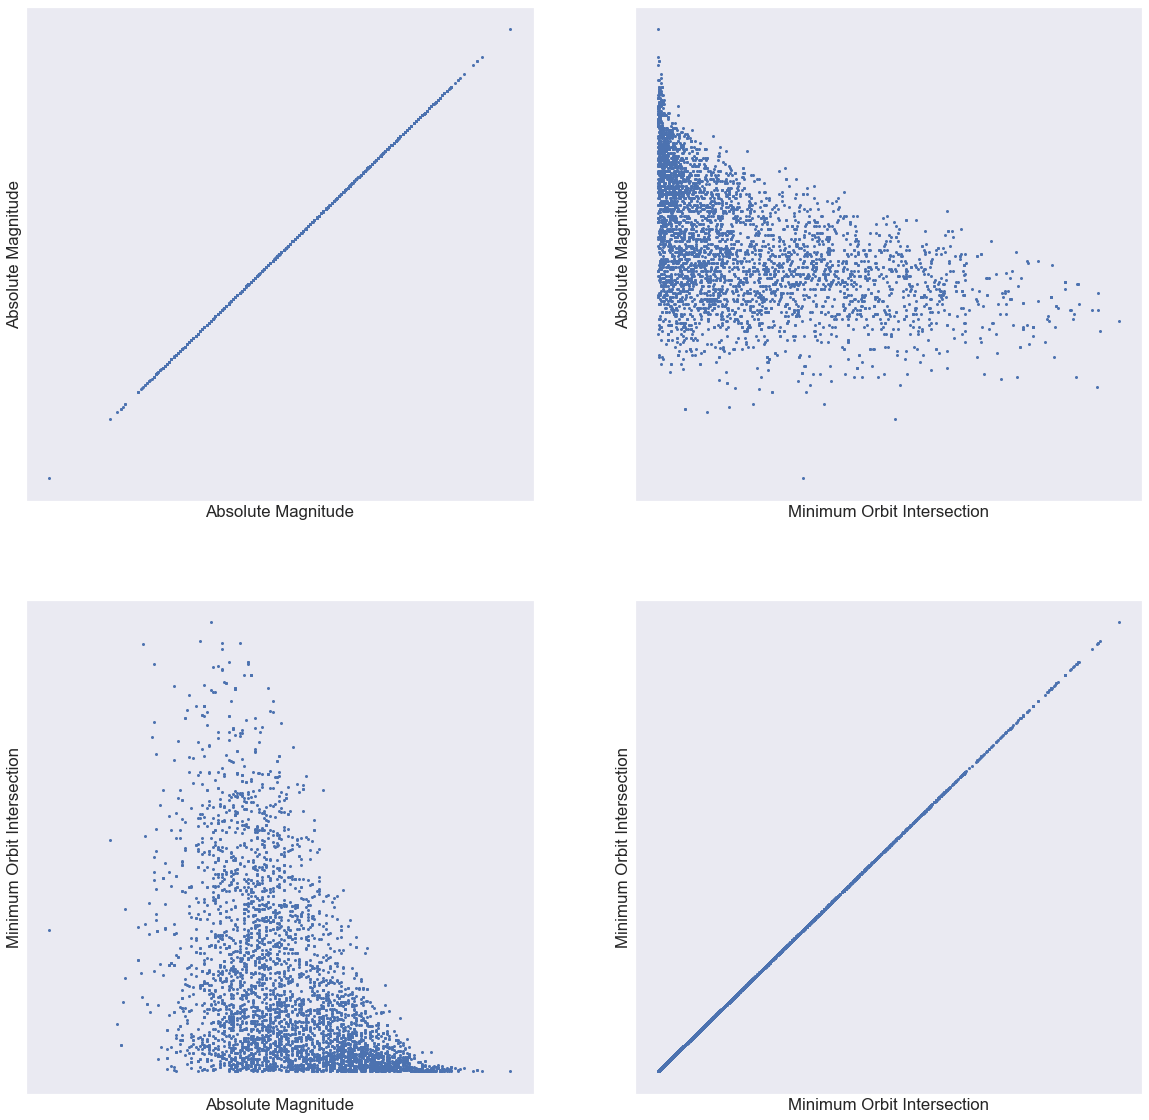

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

colunas = list(neo_df.head())
colunas = colunas[0:-1]
nomeColunas = sorted(colunas) 
numColunas = len(nomeColunas)
fig, ax = plt.subplots(numColunas, numColunas, figsize=(20, 20), constrained_layout = False)

for lin in range(0, numColunas):
    for col in range(0,numColunas): 
        ax[lin,col].scatter(x = neo_df[nomeColunas[col]], y = neo_df[nomeColunas[lin]],s = 4) 
        ax[lin,col].set(xticks = [], yticks = [], xlabel = nomeColunas[col], ylabel = nomeColunas[lin])
        
plt.show()

### Normalização

In [43]:
from sklearn.preprocessing import robust_scale

neo_df['absolute_magnitude_scaled'] = robust_scale(neo_df['Absolute Magnitude'])
neo_df['minimum_orbit_intersection_scaled'] = robust_scale(neo_df['Minimum Orbit Intersection'])
neo_df = neo_df[[
        'Absolute Magnitude', 
        'Minimum Orbit Intersection', 
        'absolute_magnitude_scaled',
        'minimum_orbit_intersection_scaled',
        'Hazardous'
    ]]

In [44]:
neo_df.head()

Absolute Magnitude  Minimum Orbit Intersection  absolute_magnitude_scaled  \
0                21.6                    0.025282                  -0.068182   
1                21.3                    0.186935                  -0.136364   
2                20.3                    0.043058                  -0.363636   
3                27.4                    0.005512                   1.250000   
4                21.6                    0.034798                  -0.068182   

   minimum_orbit_intersection_scaled  Hazardous  
0                          -0.202586       True  
1                           1.280355      False  
2                          -0.039516       True  
3                          -0.383949      False  
4                          -0.115289       True

-----

## 4. Nova classificação

In [45]:
features = ['absolute_magnitude_scaled', 'minimum_orbit_intersection_scaled']

In [46]:
neo_features_df = neo_df[features]
neo_classes_df = neo_df.iloc[:,-1]

features_train, features_test, classes_train, classes_test = \
train_test_split(neo_features_df, neo_classes_df, test_size = 0.2, random_state = 1, stratify = neo_classes_df)

In [47]:
clf = svm.SVC()
clf.fit(features_train, classes_train)
predicted = clf.predict(features_test)

#### Métricas

##### Matriz de confusão

<AxesSubplot:xlabel='Predito', ylabel='Esperado'>

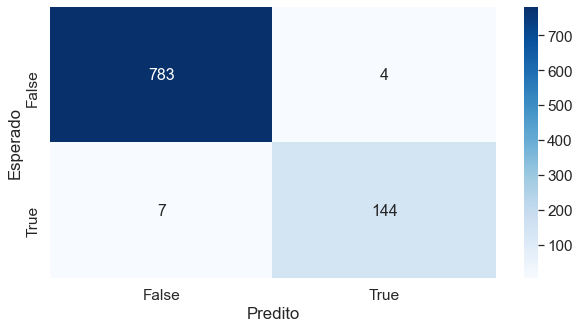

In [48]:
cm = confusion_matrix(classes_test, predicted)

cm_df = pd.DataFrame(cm, columns = np.unique(classes_test), index = np.unique(classes_test))
cm_df.index.name = 'Esperado'
cm_df.columns.name = 'Predito'
plt.figure(figsize = (10, 5))
sn.set(font_scale = 1.4)
sn.heatmap(cm_df, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

#### Report Classification

In [49]:
print('Acurácia: %.2f' % accuracy_score(classes_test, predicted))
print('Precisão: %.2f' % precision_score(classes_test, predicted, zero_division = False))
print('Recall: %.2f' % recall_score(classes_test, predicted, zero_division = False))
print('F-sore: %.2f' % f1_score(classes_test, predicted, zero_division = False))

Acurácia: 0.99
Precisão: 0.97
Recall: 0.95
F-sore: 0.96


In [50]:
metrics_pos = metrics.classification_report(classes_test, predicted, zero_division = False)
print(metrics_pos)

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       787
        True       0.97      0.95      0.96       151

    accuracy                           0.99       938
   macro avg       0.98      0.97      0.98       938
weighted avg       0.99      0.99      0.99       938



------

## 5. Análise de resultados

### Antes do pré-processamento

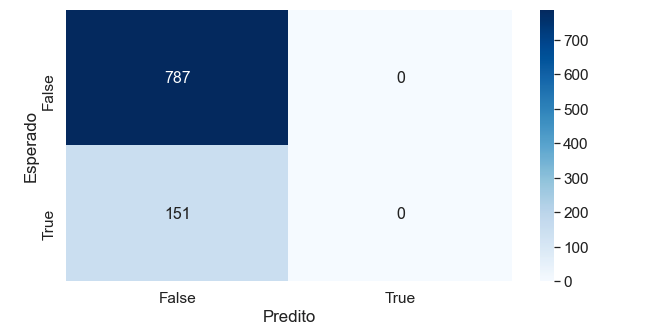

In [51]:
print(metrics_pre)

              precision    recall  f1-score   support

       False       0.84      1.00      0.91       787
        True       1.00      0.00      0.00       151

    accuracy                           0.84       938
   macro avg       0.92      0.50      0.46       938
weighted avg       0.86      0.84      0.77       938



### Após o pré-processamento

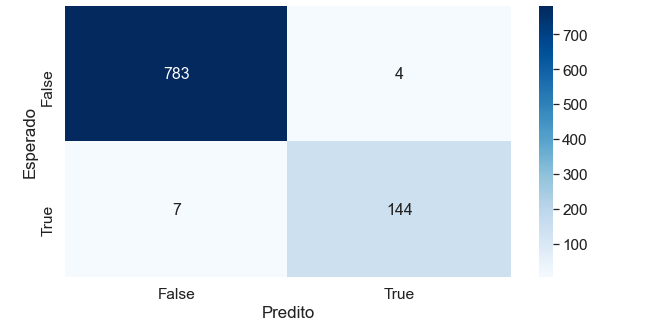

In [52]:
print(metrics_pos)

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       787
        True       0.97      0.95      0.96       151

    accuracy                           0.99       938
   macro avg       0.98      0.97      0.98       938
weighted avg       0.99      0.99      0.99       938

